In [1]:
using ProfileView
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

kltSA (generic function with 1 method)

In [2]:
#tt=collect(1e-5:0.001:2.0)

In [3]:
#yty=tt.^4.*exp.(tt)./((exp.(tt)-1).^2)

In [4]:
Eoff=5.0
Ts=collect(300.0:10.0:900.0)
######################################################################################
##for Liu x=0.6 best fit x=0.635 N=-1.45e20
######################################################################################
numofn=[-1.8e20]#,-1.22e18,-1.02e18,-0.94e18]#-9.5e19,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
numofnn=[1e18]#,1e18,1e18,1e18]
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
xs=[0.6]#,0.8,0.7,0.61]#collect(0.0:0.01:1.0)
Es=collect(0.0:0.1:3.0)

var0=[Ts[1],xs[1]]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

alphaX1(var)=0.0#EX1(var0)
alphaX3(var)=0.0#EX1(var0)
alphaLH(var)=0.0#EX3(var0)
alphaHH(var)=0.0#EX3(var0)

function Da(band::parBandTx,x::Float64)
    Da=7.0#9.0-1.5*x*x
    Dv=1.0
    if band==bandX3 ||  band==bandX1
        return Da
    end
    if band==bandHH ||  band==bandLH
        return Dv
    end
end

bandX3=parBandTx(true,1.0,effMassX3(var0),alphaX3(0.0),EX3(var0),[EX3],[effMassX3],[alphaX3],var0)
bandX1=parBandTx(true,1.0,effMassX1(var0),alphaX1(0.0),EX1(var0),[EX1],[effMassX1],[alphaX1],var0)
bandHH=parBandTx(true,1.0,effMassHH(var0),alphaHH(0.0),EHH(var0),[EHH],[effMassHH],[alphaHH],var0)
bandLH=parBandTx(true,1.0,effMassLH(var0),alphaLH(0.0),ELH(var0),[ELH],[effMassLH],[alphaLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX1,bandX3,bandX3,bandX3],var0)#
#bndstTx=BandStrucTx([bandX3,bandX3,bandX3],var0)#

#vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
vartau0=[bandX3.effMass,Ts[1],EX1(var0),xs[1],EX1(var0),bandX3,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandLH]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst
#tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauAC(var)=tauAC_func(Cl(var[4]),Da(var[6],var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1]
,var[3],tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauPOP3(var)=tauPOP3_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(epsilon0_x(var[4]),var[1],var[9])
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI,tauPOP3],vartau0)#,tauII2,tauPOP2,tauPOP3

xmax=3.0

3.0

In [5]:
Ec0(1.0)

-0.165

In [6]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis,sigmaes,sigmahs,seebeckes,seebeckhs)=electronicPropsiso(bndstTx,xs,Ts,numofn,numofnn,tauTOTTx,xmax)
x=3.0

 24.638106 seconds (94.62 M allocations: 16.230 GiB, 6.53% gc time)


3.0

In [26]:
foreach(x->println(x," ", kees[x,1,1]),1:length(sigmaes[:,:,1]))

1 1.3155054623979414
2 1.3283052816092886
3 1.3399956332229888
4 1.3511213697375395
5 1.3603723419488611
6 1.3687808926874447
7 1.3763042016294664
8 1.38296910112943
9 1.3890365644730351
10 1.393884886182886
11 1.398057851634566
12 1.4015591848697533
13 1.404414264697371
14 1.4069263571972515
15 1.408336709874661
16 1.4093014068807732
17 1.4097818209512265
18 1.4097908967384007
19 1.4093499632121773
20 1.408482824087639
21 1.4073184337309221
22 1.4055193975127565
23 1.4034278532576154
24 1.401030553019592
25 1.39833799604896
26 1.3953671326815709
27 1.3921365346976171
28 1.3886686198260518
29 1.3849785686497578
30 1.3810732260217962
31 1.3769256387311466
32 1.3726458505047234
33 1.368234327543595
34 1.3637077535702837
35 1.359092667440767
36 1.3544026270991703
37 1.349654685909905
38 1.3448722032354716
39 1.3400986751810446
40 1.335334483584509
41 1.3305753380429088
42 1.3258459738850732
43 1.3212683538601153
44 1.316801394424676
45 1.3124833049757227
46 1.308345589859496
47 1.30449859

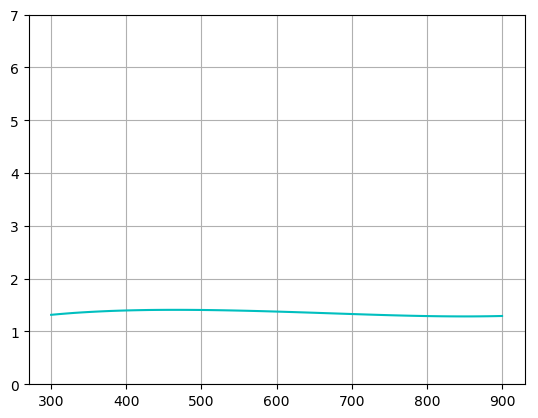

In [25]:
plot(Ts,kees[:,1,1],linestyle="-",color="c")
ylim(0,7)
grid()

In [27]:
foreach(x->println(x," ", kbis[x,1,1]),1:length(sigmaes[:,:,1]))

1 2.949109176052496e-8
2 6.791330443388531e-8
3 1.5014254234559267e-7
4 3.1742243173470566e-7
5 6.434305958150358e-7
6 1.2619075922048286e-6
7 2.3554069628515447e-6
8 4.278690021591394e-6
9 7.550329541746218e-6
10 1.2970215982445927e-5
11 2.165740258274611e-5
12 3.520153979059079e-5
13 5.6137933016661674e-5
14 8.776142558619685e-5
15 0.00013593283653349564
16 0.0002017965357002294
17 0.0002979602445263937
18 0.0004338961564456515
19 0.0006228836459444481
20 0.0008824718521244369
21 0.0012245211412993818
22 0.001686710741253966
23 0.0022992905630934567
24 0.0031014139291431746
25 0.004127631530026417
26 0.005433706895402406
27 0.007105777746671159
28 0.009218102311196926
29 0.011863988626711165
30 0.015073529096103502
31 0.019047082726504926
32 0.023932679798967234
33 0.02988119864325261
34 0.037083302233216764
35 0.04546674391444157
36 0.05561778418516338
37 0.06771091868498406
38 0.08201020426279011
39 0.0986791893408579
40 0.11783962283911453
41 0.14039361093810387
42 0.1665795817239

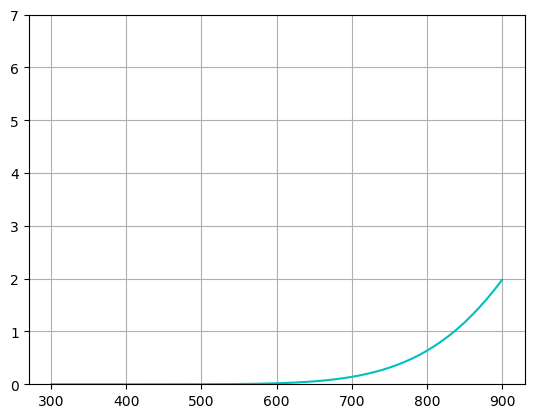

In [30]:
plot(Ts,kbis[:,1,1],linestyle="-",color="c")
ylim(0,7)
grid()

In [31]:
foreach(x->println(x," ", seebecks[x,1,1], "   es ",seebeckes[x,1,1],"   hs ",seebeckhs[x,1,1]),1:length(sigmaes[:,:,1]))

1 -0.00011538644255041913   es -0.00011538644277996743   hs 0.002054591429941007
2 -0.00011834829005156932   es -0.00011834829058920873   hs 0.001985000525720358
3 -0.00012126384127267546   es -0.0001212638424822436   hs 0.0019184071230918173
4 -0.0001241342431765912   es -0.00012413424577863518   hs 0.0018557900295011177
5 -0.00012696063637959544   es -0.00012696064174582444   hs 0.0017968813455387126
6 -0.00012974415994144133   es -0.00012974417065725563   hs 0.0017396389406118232
7 -0.00013248594489372015   es -0.00013248596523243213   hs 0.0016877303143423826
8 -0.00013518710284537137   es -0.00013518714042839308   hs 0.0016377340162221025
9 -0.000137848716581755   es -0.00013784878404076229   hs 0.0015902669168837353
10 -0.00014047183291730685   es -0.00014047195079323871   hs 0.0015449755479323027
11 -0.0001430574583944067   es -0.00014305765857281177   hs 0.0015020057737074623
12 -0.00014560655687348643   es -0.0001456068876416397   hs 0.001461598267646147
13 -0.0001481200434659

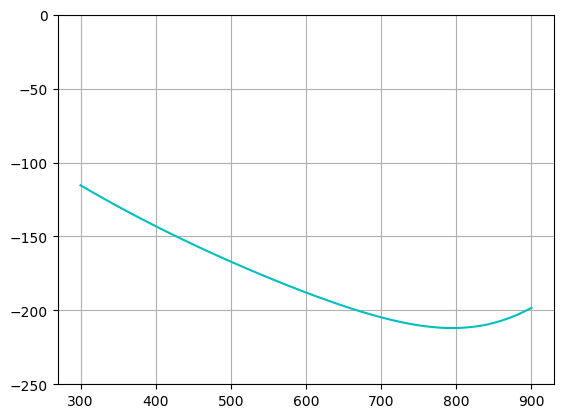

In [39]:
plot(Ts,seebecks[:,1,1]*1e6,linestyle="-",color="c")
ylim(-250,-0)
grid()

In [40]:
foreach(x->println(x," ", sigmas[x,1,1], "   es ",sigmaes[x,1,1],"   hs ",sigmahs[x,1,1]),1:length(sigmaes[:,:,1]))

1 197351.39315898   es 197351.39313810345   hs 2.087656226042524e-5
2 193727.27933811626   es 193727.2792885974   hs 4.951885175855632e-5
3 190179.3382471559   es 190179.33813437552   hs 0.00011278038160825933
4 186706.9396186032   es 186706.93937323036   hs 0.0002453728539333199
5 183309.17022399994   es 183309.1697126903   hs 0.0005113096563617155
6 179984.87788664916   es 179984.8768549267   hs 0.0010317224525252403
7 176732.74319067094   es 176732.74121589662   hs 0.001974774315775408
8 173551.34840419333   es 173551.3447251893   hs 0.0036790040359559397
9 170439.2308397447   es 170439.224186451   hs 0.006653293705643483
10 167394.9159202617   es 167394.90421308498   hs 0.01170717670801267
11 164416.93870695555   es 164416.91869999416   hs 0.020006961379866177
12 161503.8531669521   es 161503.81992892327   hs 0.03323802881110774
13 158654.24083964725   es 158654.18665722967   hs 0.05418241756349876
14 155866.6984150079   es 155866.6118783586   hs 0.08653664930153891
15 153139.85506

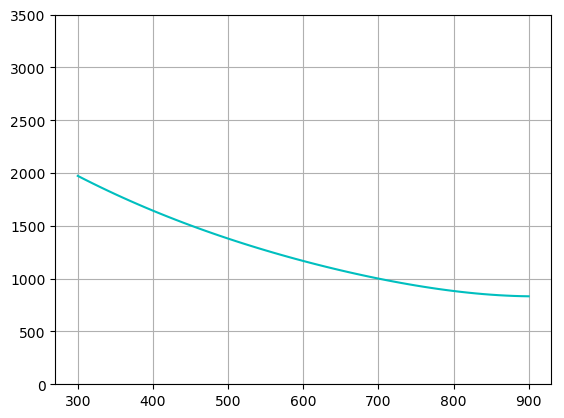

In [41]:
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="c")
ylim(0,3500)
grid()

In [7]:
T_EF_Dict=Dict()
for (Ti,Tx) in enumerate(Ts)
    T_EF_Dict[Tx]=(Efs[Ti])    
end
T_EF_Dict_Array=Array{Dict{Float64,Float64},2}(length(numofn),length(xs))
Dict_temp=Dict()
Efsr=Array{Float64,3}(length(Ts),length(numofn),length(xs))
for (j,jn) in enumerate(numofn)
    for (k,kx) in enumerate(xs) 
        for (i,iT) in enumerate(Ts)
            Efsr[i,j,k]=Efs[i,j,k]-EX3(0.0)
            Dict_temp[iT]=Efsr[i,j,k]
            T_EF_Dict_Array[j,k]=Dict_temp 
        end
    end
end
#foreach(i->println("$i= ",Ts[i]),1:length(Ts))
#Efsr

In [8]:
foreach(x->println(x," EX3 ", Efsr[x,1,1]," EX1 ", Efsr[x,1,1]-Ec0(0.6)),1:length(Efsr[:,:,1]))

1 EX3 0.10132632198393399 EX1 0.04032632198393396
2 EX3 0.10052559761605462 EX1 0.03952559761605459
3 EX3 0.09970004193718296 EX1 0.03870004193718293
4 EX3 0.09884987345101237 EX1 0.037849873451012345
5 EX3 0.0979752733457051 EX1 0.03697527334570508
6 EX3 0.09707638455133338 EX1 0.03607638455133336
7 EX3 0.09615332192249415 EX1 0.035153321922494124
8 EX3 0.09520618499258315 EX1 0.03420618499258313
9 EX3 0.09423506876004595 EX1 0.03323506876004592
10 EX3 0.09324007095153863 EX1 0.03224007095153861
11 EX3 0.09222129590980277 EX1 0.031221295909802743
12 EX3 0.09117885596788522 EX1 0.030178855967885193
13 EX3 0.09011287129009293 EX1 0.029112871290092907
14 EX3 0.08902346899839753 EX1 0.0280234689983975
15 EX3 0.08791078215833537 EX1 0.02691078215833534
16 EX3 0.08677494897186122 EX1 0.025774948971861195
17 EX3 0.08561611235410194 EX1 0.02461611235410191
18 EX3 0.08443441996049739 EX1 0.02343441996049736
19 EX3 0.08323002466967822 EX1 0.02223002466967819
20 EX3 0.08200308550090885 EX1 0.021

In [12]:
#println("-1")
#############Lattice Thermal Conductivity Parameters###############
con=1.0
thetaL=52.3e12*hbar/kB # K 
thetaT=29.7e12*hbar/kB  # K
vL=(1-con)*7700+con*4900    # m/s
vT=(1-con)*4900+con*3000    # m/s
gammaL=2.5*(1-con)+1.7*con
gammaT=2.5*(1-con)+1.7*con
M=(2*(24.305e-3)+(28.0855e-3*(1-con)+118.71e-3*con))/3/Nav
V=((1-con)*(6.39e-10)^3+con*(6.77e-10)^3)/12
a=V^(1.0/3.0)
ro=M/V
Vdj=(((6.39e-10)^3)/((1-con)*(6.39e-10)^3+con*(6.77e-10)^3))^(1/3)
jL=vL/7700*Vdj
jT=vT/4900*Vdj
thetaLx=thetaL*jL
thetaTx=thetaT*jT
##########Boundary Scattering###############3
D=11e-9
p=0.65
##########Alloy Scattering###################
mbar=(28.0855*(1-con)+118.71*con)
GammaSiSn=(1-con)*((28.0855-mbar)/mbar)^2+con*((118.71-mbar)/mbar)^2
GammaMgSiSn=2*((mbar/(24.305+mbar))^2*GammaSiSn);         
##########Electron Scattering###################
Eep=5.0*q
xsp=xs[1]
Tp=300.0
mdx1=0.67*me
mdx3=0.38*me
Efx3=0.2589
Efx1=0.2589
##########Nanoparticle Scattering###################
NP=0.0
a=1.0
alpha=0.5 #specularity factor
d=97.0e-9#

#vartauPH0=[[0.02],Ts[1],gammaL,gammaT,xsp,thetaCLx,thetaCTx,thetaCTx,MSi,MGe,VSi,a,T_EF_Dict,0.0]
vartauPH0=[ [0.02],  Ts[1],   gammaL,  gammaT, con,#5
    thetaLx, thetaTx, thetaTx, M,   M, #10
    V, a, T_EF_Dict_Array, Eep, alpha, #15
    d, thetaLx, thetaTx, vL, vT, #20
    vL, vT, p, NP,Tsindex=1,#25
    numberofnindex=1,xsindex=1,p,D,GammaMgSiSn,#30
    mdx1,mdx3,Efx1,Efx3,ro#35
    ]
thetaCLx=thetaCL(vartauPH0[12],vartauPH0[5],vartauPH0[17],vartauPH0[19],vartauPH0[11])
thetaCTx=thetaCT(vartauPH0[12],vartauPH0[5],vartauPH0[18],vartauPH0[19],vartauPH0[11])
#println("2")
tauPHNLf(var)=tauPH_NL(var[3],var[11],var[1],var[2],var[9],var[21])
tauPHNTf(var)=tauPH_NT(var[4],var[11],var[1],var[2],var[9],var[22])                  


tauPHULf(var)=tauPH_U(var[3],var[1],var[2],var[9],var[19],var[17])
tauPHUTf(var)=tauPH_U(var[4],var[1],var[2],var[9],var[20],var[18])

tauPHALLLf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[19])
tauPHALLTf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[20])

tauPHeLfX3(var)=tauPH_e(var[14],mdx3,var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[21])
tauPHeTfX3(var)=tauPH_e(var[14],mdx3,var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[22])

tauPHeLfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
    ,var[1],var[2],var[21])
tauPHeTfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
    ,var[1],var[2],var[22])

tauPHBLf(var)=tauPH_B(var[19],var[28],var[29])
tauPHBTf(var)=tauPH_B(var[20],var[28],var[29])
#println("3")
tauPHTOTL=tau_phonon_B([tauPHNLf,tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1],vartauPH0)#,tauPHALLLf,tauPHeLf,tauPH_eLf ,tauPHALLLf ,tauPHBLf,,tauPHULf
tauPHNL=tau_phonon_B([tauPHNLf],vartauPH0)
tauPHRL=tau_phonon_B([tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1],vartauPH0) #,tauPHALLLf,tauPHeLf,tauPHALLLf,tauPH_eLf] ,tauPHBLf


tauPHTOTTx=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1],vartauPH0) #,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf
tauPHNTx=tau_phonon_B([tauPHNTf],vartauPH0)
tauPHRTx=tau_phonon_B([tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1],vartauPH0) #,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf


tauPHTOTTy=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1],vartauPH0) #,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf tauPHBTf
tauPHNTy=tau_phonon_B([tauPHNTf],vartauPH0)
tauPHRTy=tau_phonon_B([tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1],vartauPH0) #,tauPHALLTf,tauPH_eTf ,tauPHBTf,tauPHALLTf,tauPHeTf
#println("4")

tauPHL=[tauPHTOTL,tauPHNL,tauPHRL]
tauPHTx=[tauPHTOTTx,tauPHNTx,tauPHRTx]
tauPHTy=[tauPHTOTTx,tauPHNTx,tauPHRTx]
xmax=1.0

1.0

In [49]:
kls=Array{Float64}(length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)
    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,kls[iT,1,1])= kl(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,iTx,[vL,vT,vT])
    println("T=", iTx, " kl= " ,round(kls[iT,1,1]*10000)/10000)
    println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,
    " kTx/3=",kTx," kTy/3=",kTy)
end

T=300.0 kl= 4.1808
IL1= 1.7815366640601003e-13 IL2= 0.13775323689737973 IL3= 2.41418203098204e10 ITx1= 1.085097797974604e-14 ITx2= 0.025966350655778115 ITx3= 4.887896976424938e9 kL/3=2.779559864988783 kTx/3=0.7006176105208505 kTy/3=0.7006176105208505
T=310.0 kl= 4.0988
IL1= 1.496319260267902e-13 IL2= 0.12666736265865172 IL3= 2.261276208841167e10 ITx1= 9.006735998093022e-15 ITx2= 0.023645207803677168 ITx3= 4.566065692858753e9 kL/3=2.732884574405389 kTx/3=0.6829455379350998 kTy/3=0.6829455379350998
T=320.0 kl= 4.0195
IL1= 1.2625497869871977e-13 IL2= 0.11668108031922013 IL3= 2.12117184604494e10 ITx1= 7.51675691906282e-15 ITx2= 0.02158908048156149 ITx3= 4.2742037497075605e9 kL/3=2.687326209422652 kTx/3=0.6661080404301164 kTy/3=0.6661080404301164
T=330.0 kl= 3.943
IL1= 1.0699732863075075e-13 IL2= 0.10766958553233548 IL3= 1.9926225486777046e10 ITx1= 6.3055964429041185e-15 ITx2= 0.019761704355787807 ITx3= 4.008795417628415e9 kL/3=2.6428928579507835 kTx/3=0.650050588962892 kTy/3=0.650050588962

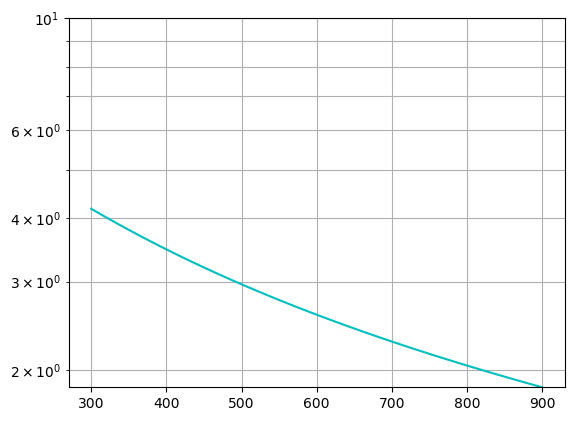

In [67]:
semilogy(Ts,kls[:,1,1],linestyle="-",color="c")
ylim(0,10)

grid(true,which="both")


In [14]:
kls=thermalPropsiso(Ts,tauPHL,tauPHTx,tauPHTy,[vL,vT,vT])

LoadError: [91mMethodError: Cannot `convert` an object of type NTuple{10,Float64} to an object of type Float64
This may have arisen from a call to the constructor Float64(...),
since type constructors fall back to convert methods.[39m

In [15]:
xxsp=0.6
xsp=(100-xxsp)/100
Eep=7.0
etha=0.96
thetaD=350.0#524.0
#gammaSA,GM,Tts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha

Tt=thetaD
gammaSA=2.02
beta=2.0

eps=39
deltaSi=6.39e-10
deltaGe=6.77e-10
delta=deltaSi*(1-xsp)+deltaGe*xsp
deltacgs=delta*100
V=((1-xsp)*(6.39e-10)^3+xsp*(6.77e-10)^3)/12
MSiGecgs(xsp)=(2*(24.305)+(28.0855*(1-xsp)+118.71*xsp))/3
#G=1.033*(1-xsp)+1.017*xsp

a3=((1-xsp)*(6.39e-10)^3+xsp*(6.77e-10)^3)/12
a1=a3^(1/3)
#vtt=kB/hbar*(6*pi*pi)^(-1/3)*thetaD*delta
dd=(4.66e-26*(1-xsp)+1.206e-25*xsp)/(2e-29*(1-xsp)+2.2636e-29*xsp)

delMSiGe=(2*(24.305)+(28.0855*(1-xsp)-118.71*xsp))/3
deldelta=deltaSi-deltaGe
mbar=(28.0855*(1-xsp)+118.71*xsp)
GM=(1-xsp)*((28.0855-mbar)/mbar)^2+xsp*((118.71-mbar)/mbar)^2

omegaD=thetaD*kB/hbar
mds=0.5*me#0.427*me
#vt=5880.0

4.55469178e-31

In [16]:
function tauPH_U_SAT(gamma::Float64,intx::Array{Float64},T::Float64,M::Float64,
    theta::Float64,omegaD::Float64,beta::Float64,delta::Float64)
    #intx is different from x in oither phonon calculations intx=omega/omegaD
    Mcgs=M
    #println("Mcgs= ",Mcgs)
    deltacgs=delta*100
    #println("deltacgs= ",deltacgs)
    #println("1/Mcgs/deltacgs^2/(theta/T)= ",(1/Mcgs/deltacgs^2/(theta/T)))
    return 1./((3.264e-2)*((1+beta*(5/9))/(1+beta))*gamma^2.*intx.^2./Mcgs/deltacgs^2/(theta/T))    
end

function tauPH_EP_SAT(Eep::Float64,md::Float64,x::Array{Float64},Ef::Float64,
    T::Float64,M::Float64,theta::Float64,delta::Float64)
    eta=Ef#Ef*q/kB/T
    deltacgs=delta*100
    Mcgs=M
    A=6.76e26(md/me)^2*deltacgs^2/Mcgs
    y=3.72e9(md/me)*deltacgs^2*theta
    D=1.68e-11/(md/me)/deltacgs^2/theta
    alphat=thetaD/T
    #println("alphat ",alphat)
    lambda=3
    ex1=1+exp.(-alphat*y+eta-D*alphat*x.*x+alphat.*x/2)
    ex2=1+exp.(-alphat*y+eta-D*alphat*x.*x-alphat.*x/2)    
    ext=ex1./ex2
    logt=log.(ext)
    return 1./(lambda*(A*Eep^2/alphat).*logt) 
end

function tauPH_PD_SAT(GM::Float64,intx::Array{Float64},theta::Float64)
    return 1./(6.17e11*theta*GM.*intx.^4)
end


function I1(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1./((beta+1)./tauPH_U_SA_Af(x)+1./tauPH_EP_SA_Af(x)+1./tauPH_PD_SA_Af(x))
    
    integrand(x)=tauPH_C_SA_Af(x).*(x.^4)*alphat^2.*exp.(alphat*x)./(exp.(alphat*x)-1).^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function I2(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1./((beta+1)./tauPH_U_SA_Af(x)+1./tauPH_EP_SA_Af(x)+1./tauPH_PD_SA_Af(x))
    
    integrand(x)=beta*tauPH_C_SA_Af(x)./tauPH_U_SA_Af(x).*(x.^4)*alphat^2.*exp.(alphat*x)./(exp.(alphat*x)-1).^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function I3(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1./((beta+1)./tauPH_U_SA_Af(x)+1./tauPH_EP_SA_Af(x)+1./tauPH_PD_SA_Af(x))
    
    integrand(x)=beta*1./tauPH_U_SA_Af(x).*
    (1-beta*tauPH_C_SA_Af(x)./tauPH_U_SA_Af(x)).*(x.^4)*alphat^2.*exp.(alphat*x)./(exp.(alphat*x)-1).^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function klt(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)    
    I1t=I1(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    I2t=I2(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    I3t=I3(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    return 4.67e-2*(thetaD^2/delta/100)*(I1t+I2t.^2/I3t)#(I1t+I2t.^2/I3t)#(kB*thetaD/hbar)^3*(I1t+I2t.^2/I3t)    #4.67e-2*(thetaD^2/delta/100)*(I1t+I2t.^2/I3t)    
end
klt_SA_A=Array{Float64,1}(length(Ts))
for Tti in 1:length(Ts)
    klt_SA_A[Tti]=klt(gammaSA,GM,Ts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,
        Efsr[Tti,1,1]/kBe/Ts[Tti])
    #klt_V_A[Tti]=kltV(gammaSA,Tts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)*(thetaD/Ttt)^2    
end

In [17]:
MgSiSn4hKCT=[27.204980536447565,125.22263104569937,250.3986028902043, 300.61256865568174,350.4225990508186, 400.31661600810537,
450.60323681544304,500.88852450274595,550.37460672959,]
MgSiSn4hKCK=[ 2.8789473684210525, 2.7375, 2.609210526315789, 2.5121710526315786, 2.4184210526315786, 2.531907894736842, 2.614144736842105
, 2.6930921052631573, 2.7999999999999994]
MgSiSn2hKCT=[27.174994546327184, 125.66321921825845, 250.56521889830958, 300.8030294412153, 350.04276302458277,400.3366068836394, 
450.6409643790327, 500.95101524496823,550.7594666065552]
MgSiSn2hKCK=[2.608956937799043, 2.4846513157894736, 2.4523355263157893, 2.3861330409356722, 2.3131756578947367
, 2.385235380116959, 2.4832374999999995, 2.595288011695906, 2.697641746411483]
MgSiSn05hKCT=[26.1867119039,124.6184700145,249.7991072943,300.1809590466,349.8324946796,399.3641637338,450.1016014407,
450.7811561579,549.7232004091,500.4092678505]
MgSiSn05hKCK=[2.4217028509,2.3627326555,2.2459551435,2.1025076754,2.0223385167,2.2370652412,2.3803594498,2.302875,
2.5966549043,2.5105263158]
MgSiSn2h2TiO2KCT=[450.7811561579,26.5677491601,125.429931211,250.6172345758,300.4185996907,350.6278995361,
400.1639737642,500.3759398496,550.2639577668]
MgSiSn2h2TiO2KCK=[2.302875,2.3065789474,2.2490131579,2.1486842105,2.0335526316,1.925,2.1552631579,2.4282894737,
2.5269736842]
MgSiSn2h5TiO2KCT=[27.3549565403,124.5907321495,250.1753052845,299.9806697595,350.1926358449,400.1339785634,
450.0339945609,500.3299472084,550.6152348958]
MgSiSn2h5TiO2KCK=[2.2490131579,2.1782894737,2.0582236842,1.9529605263,1.8509868421,2.08125,2.2095394737,2.3148026316,
2.39375]
MgSiSn0hKCT=[26.9755694846,125.1437396683,250.3474884019,300.0735322348,349.8027683571,400.6191835973,449.916314723,
500.2366154749,550.052698235]
MgSiSn0hKCK=[2.1168755981,2.0268355263,1.9150855263,1.8140986842,1.7209888158,1.8544934211,1.9231644737,2.0605065789,
2.1816907895]

9-element Array{Float64,1}:
 2.11688
 2.02684
 1.91509
 1.8141 
 1.72099
 1.85449
 1.92316
 2.06051
 2.18169

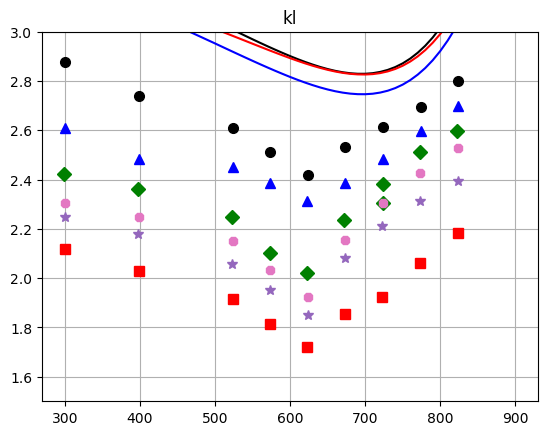

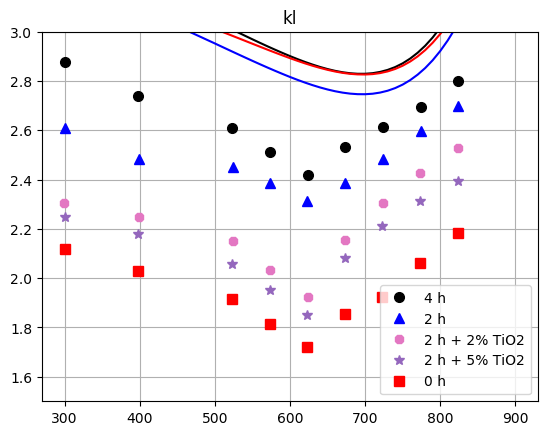

In [18]:
figure()
title("kl")
plot(Ts,36*klt_SA_A+kes[:,1,1]+0.6*kbis[:,1,1],Linestyle="-",color="k")
plot(Ts,34*klt_SA_A+kes[:,1,1]+0.567*kbis[:,1,1],Linestyle="-",color="b")
plot(Ts,28*klt_SA_A+1.48kes[:,1,1]+0.57*kbis[:,1,1],Linestyle="-",color="g")
plot(Ts,29*klt_SA_A+1.5kes[:,1,1]+0.53*kbis[:,1,1],Linestyle="-.",color="tab:pink")
plot(Ts,27*klt_SA_A+1.5kes[:,1,1]+0.53*kbis[:,1,1],Linestyle="-.",color="tab:purple")
plot(Ts,26*klt_SA_A+1.3kes[:,1,1]+0.52*kbis[:,1,1],Linestyle="-",color="r")
plot(MgSiSn4hKCT+273,MgSiSn4hKCK,linestyle="None",marker="o",markersize=7,color="k")
plot(MgSiSn2hKCT+273,MgSiSn2hKCK,linestyle="None",marker="^",markersize=7,color="b")
plot(MgSiSn05hKCT+273,MgSiSn05hKCK,linestyle="None",marker="D",markersize=7,color="g")
plot(MgSiSn2h2TiO2KCT+273,MgSiSn2h2TiO2KCK,linestyle="None",marker="8",markersize=7,color="tab:pink")
plot(MgSiSn2h5TiO2KCT+273,MgSiSn2h5TiO2KCK,linestyle="None",marker="*",markersize=7,color="tab:purple")
plot(MgSiSn0hKCT+273,MgSiSn0hKCK,linestyle="None",marker="s",markersize=7,color="r")
#plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_SA_162_Bulk_KC_T2,SiGe_SA_162_Bulk_KC_K2,linestyle="None",marker="o",markersize=7,color="g")
legend(loc="upper left")
ylim(1.5,3.0)
grid()


figure()
title("kl")
plot(Ts,36*klt_SA_A+kes[:,1,1]+0.6*kbis[:,1,1],Linestyle="-",color="k",label="")
plot(Ts,34*klt_SA_A+kes[:,1,1]+0.567*kbis[:,1,1],Linestyle="-",color="b")
#plot(Ts,28*klt_SA_A+1.48kes[:,1,1]+0.57*kbis[:,1,1],Linestyle="-",color="g")
plot(Ts,29*klt_SA_A+1.5kes[:,1,1]+0.53*kbis[:,1,1],Linestyle="-.",color="tab:pink")
plot(Ts,27*klt_SA_A+1.5kes[:,1,1]+0.53*kbis[:,1,1],Linestyle="-.",color="tab:purple")
plot(Ts,26*klt_SA_A+1.3kes[:,1,1]+0.52*kbis[:,1,1],Linestyle="-",color="r")
plot(MgSiSn4hKCT+273,MgSiSn4hKCK,linestyle="None",marker="o",markersize=7,color="k",label="4 h")
plot(MgSiSn2hKCT+273,MgSiSn2hKCK,linestyle="None",marker="^",markersize=7,color="b",label="2 h")
#plot(MgSiSn05hKCT+273,MgSiSn05hKCK,linestyle="None",marker="D",markersize=7,color="g")
plot(MgSiSn2h2TiO2KCT+273,MgSiSn2h2TiO2KCK,linestyle="None",marker="8",markersize=7,color="tab:pink",label="2 h + 2% TiO2")
plot(MgSiSn2h5TiO2KCT+273,MgSiSn2h5TiO2KCK,linestyle="None",marker="*",markersize=7,color="tab:purple",label="2 h + 5% TiO2")
plot(MgSiSn0hKCT+273,MgSiSn0hKCK,linestyle="None",marker="s",markersize=7,color="r",label="0 h")
#plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_SA_162_Bulk_KC_T2,SiGe_SA_162_Bulk_KC_K2,linestyle="None",marker="o",markersize=7,color="g")

ylim(1.5,3.0)
legend(loc="lower right")
grid()


In [19]:
MgSiSn4hECE=[10,12.4,20.5,35.8,43.2,69.6,82.8,100,110]
MgSiSn2hECE=[3,4.4,8.5,15.8,22.2,55.6,50.8,68,80]
MgSiSn1hECE=[2,4.2,3.7,11.8,22.2,25.6,30.8,48,64]
MgSiSn0hECE=[1.6,1.7,3.8,7.8,12.2,25.6,40.8,68,62]

9-element Array{Float64,1}:
  1.6
  1.7
  3.8
  7.8
 12.2
 25.6
 40.8
 68.0
 62.0

In [20]:

figure()
plot(Ts,sigmas[:,1,1]/100/6^(2/3),linestyle="-",color="b")
plot(Ts,sigmas[:,2,2]/100/6^(2/3),linestyle="-",color="r")
plot(Ts,sigmas[:,3,3]/100/6^(2/3),linestyle="-",color="k")
plot(Ts,sigmas[:,4,4]/100/6^(2/3),linestyle="-",color="g")
plot(MgSiSn4hKCT+273,MgSiSn4hECE,linestyle="None",marker=".",markersize=10,color="r")
plot(MgSiSn4hKCT+273,MgSiSn2hECE,linestyle="None",marker=".",markersize=10,color="k")
plot(MgSiSn4hKCT+273,MgSiSn1hECE,linestyle="None",marker=".",markersize=10,color="b")
plot(MgSiSn4hKCT+273,MgSiSn0hECE,linestyle="None",marker=".",markersize=10,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Green_EC_E/100,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Blue_EC_E/100,linestyle="None",marker="o",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Pink_EC_E/100,linestyle="None",marker="o",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Black_EC_E/100,linestyle="None",marker="o",markersize=2,color="k")
grid()

figure()
plot(Ts,-seebecks[:,1,1]*1e6,linestyle="-",color="b")
plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="r")
plot(Ts,-seebecks[:,3,3]*1e6,linestyle="-",color="k")
plot(Ts,-seebecks[:,4,4]*1e6,linestyle="-",color="g")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="b")
#plot(SiGe_Vin_162_Bulk_SC_T,SiGe_Vin_162_Bulk_SC_S,linestyle="None",marker=".",markersize=10,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Green_SC_S,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Blue_SC_S,linestyle="None",marker="x",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Pink_SC_S,linestyle="None",marker="x",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Black_SC_S,linestyle="None",marker="x",markersize=2,color="k")
grid()

LoadError: [91mBoundsError: attempt to access 61×1×1 Array{Float64,3} at index [Base.Slice(Base.OneTo(61)), 2, 2][39m